# Predict Uber Fare Prices using Linear Regression

In [48]:
import pandas as pd
import os
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
os.listdir()

['dataset', 'data_preprocessing.ipynb', 'Fare_Prediction.ipynb']

In [50]:
os.listdir("dataset/")

['image.png',
 'processed_data.csv',
 'uber-fares-dataset.zip',
 'uber.csv',
 'wm.png']

In [51]:
path = "./dataset/processed_data.csv"
df = pd.read_csv(path)

In [52]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,weekday_4,weekday_5,weekday_6,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1681.11,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,7.7,-73.994355,40.728225,-73.994710,40.750325,2454.36,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
2,12.9,-74.005043,40.740770,-73.962565,40.772647,5039.60,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,5.3,-73.976124,40.790844,-73.965316,40.803349,1661.44,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,4.9,-73.969019,40.755910,-73.969019,40.755910,0.00,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


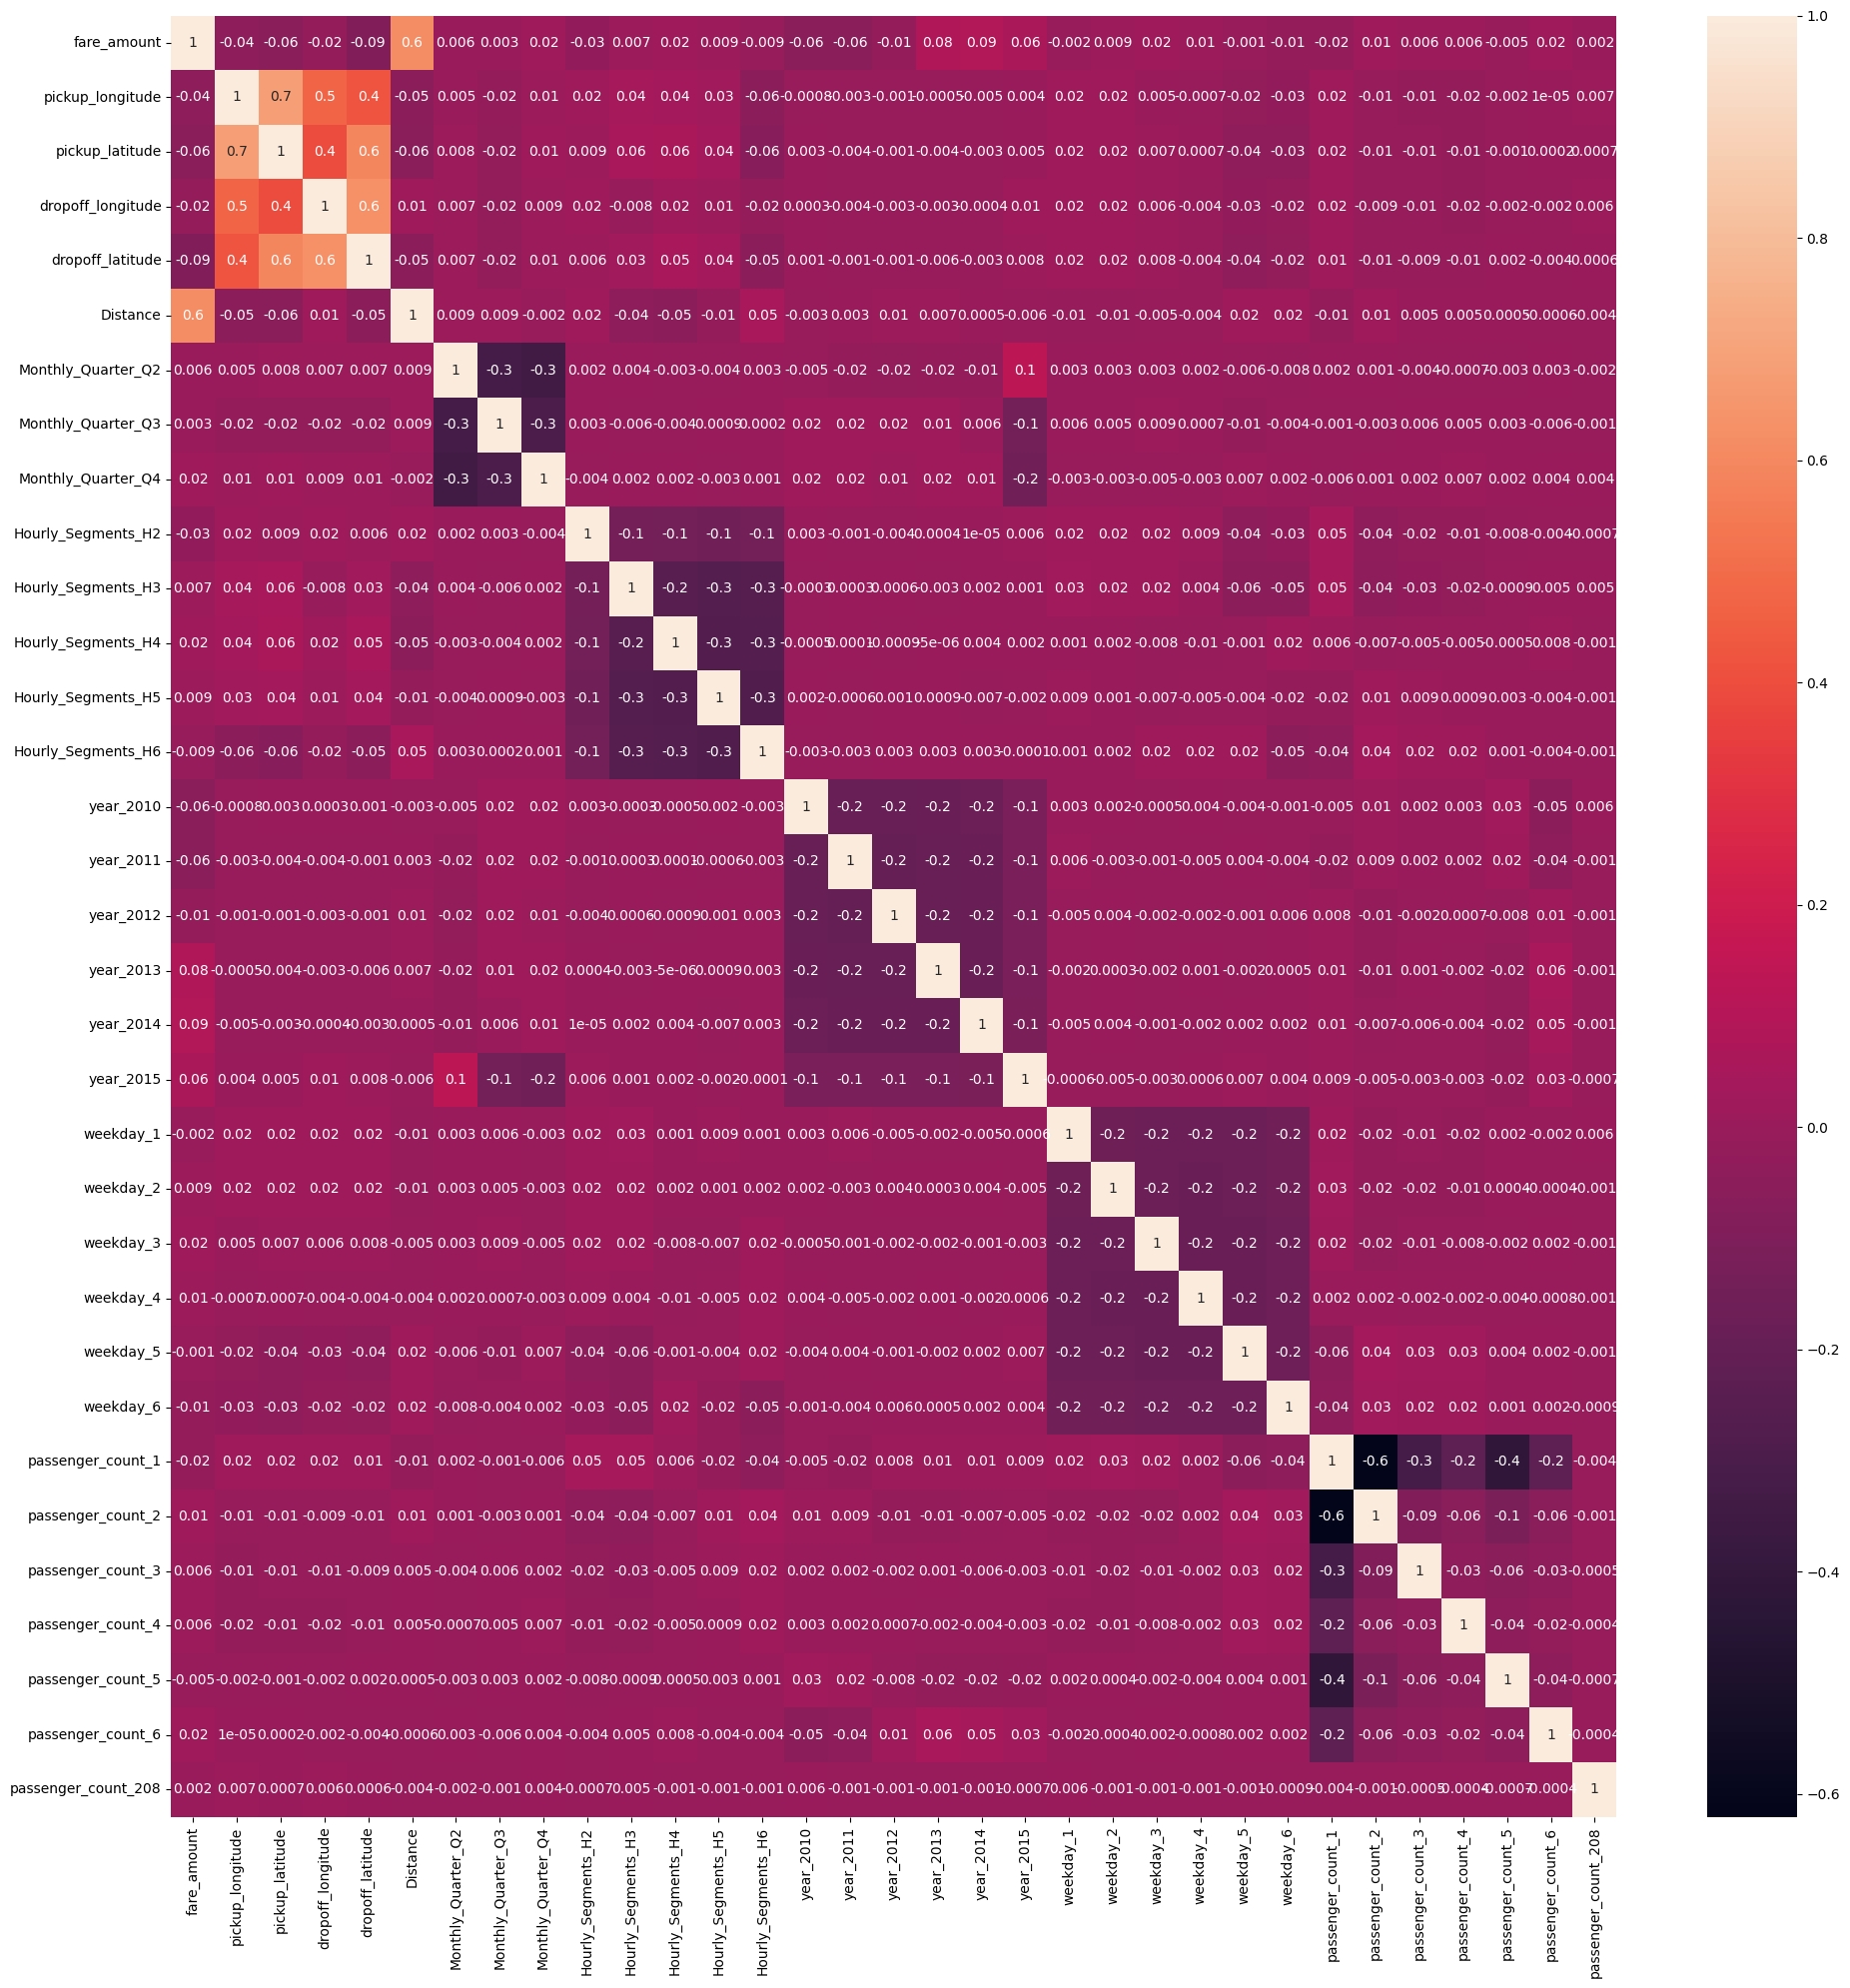

In [53]:
plt.figure(figsize=(20,20))
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt="0.1g")
plt.tight_layout()
plt.show()

By looking the the graph we can clearly see that only `Distance` has a considerable Pearson Correlation Coefficient of `0.6`, since all other factors have the value less than 0.1 including them would only hurt our predictions for the fare.

In [71]:
# X = df[['Distance','pickup_latitude','pickup_longitude','dropoff_latitude']]
X= df[['Distance']]
y = df['fare_amount']

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [73]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

model = lr_model.fit(x_train, y_train)

In [74]:
y_predict = model.predict(x_test)

In [75]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

print(f"MSE = {root_mean_squared_error(y_test, y_predict)**2}")
print(f"RMSE = {root_mean_squared_error(y_test, y_predict)}")
print(f"MAE = {mean_absolute_error(y_test, y_predict)}")
print(f"R2 Score = {r2_score(y_test, y_predict)}")

MSE = 17.81829662844566
RMSE = 4.221172423444186
MAE = 1.8301877200862333
R2 Score = 0.3006579635943928


In [76]:
print(model.intercept_)

4.047531718152443


In [77]:
print(model.coef_)

[0.00205894]


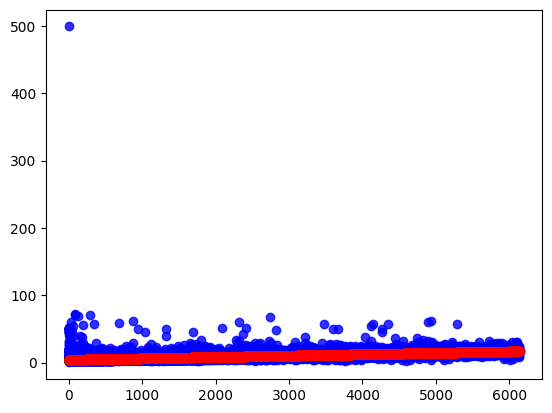

In [83]:
plt.scatter(x_test, y_test, color='blue', alpha=0.8)
plt.scatter(x_test, y_predict, color='red', alpha=0.8)
plt.show()

Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth = 2, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [85]:
y_predict = rf_model.predict(x_test)

In [86]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

print(f"MSE = {root_mean_squared_error(y_test, y_predict)**2}")
print(f"RMSE = {root_mean_squared_error(y_test, y_predict)}")
print(f"MAE = {mean_absolute_error(y_test, y_predict)}")
print(f"R2 Score = {r2_score(y_test, y_predict)}")

MSE = 17.89207896580501
RMSE = 4.229902949927458
MAE = 1.9114549418168536
R2 Score = 0.2977621149543337


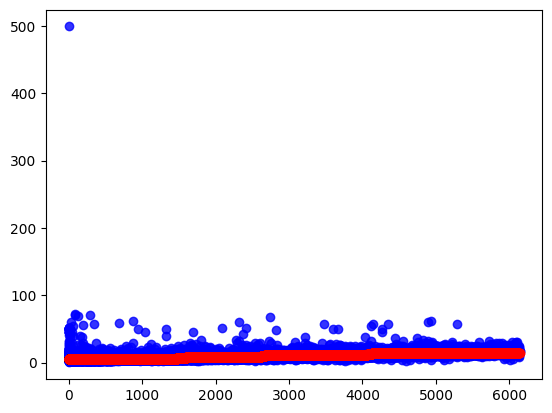

In [87]:
plt.scatter(x_test, y_test, color='blue', alpha=0.8)
plt.scatter(x_test, y_predict, color='red', alpha=0.8)
plt.show()